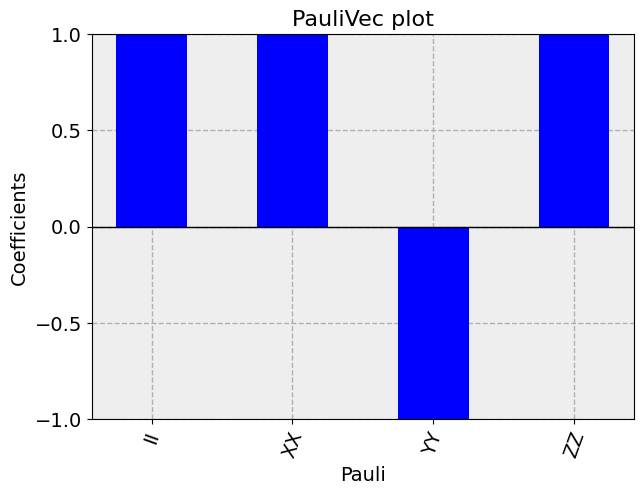

In [2]:
# You can set a color for all the bars.
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_paulivec
from qiskit.quantum_info import DensityMatrix
import numpy as np
import matplotlib.pyplot as plt

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = Statevector(qc)

plot_state_paulivec(state, color='blue', title="PauliVec plot")


## Question 30 : |+-> state Pauli Plot

[[ 0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j]
 [ 0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j]
 [-0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]
 [-0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]]


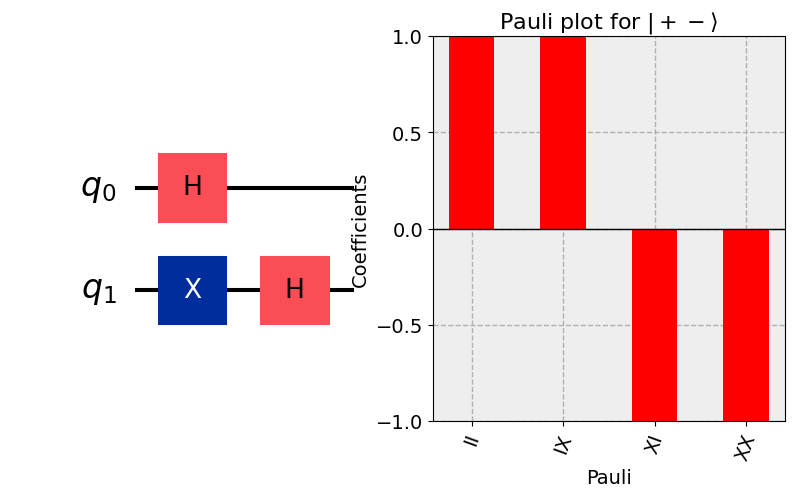

PauliVec values:
II: 1.0000
IX: -1.0000
IY: 0.0000
IZ: 0.0000
XI: 1.0000
XX: -1.0000
XY: 0.0000
XZ: 0.0000
YI: 0.0000
YX: 0.0000
YY: 0.0000
YZ: 0.0000
ZI: 0.0000
ZX: 0.0000
ZY: 0.0000
ZZ: 0.0000


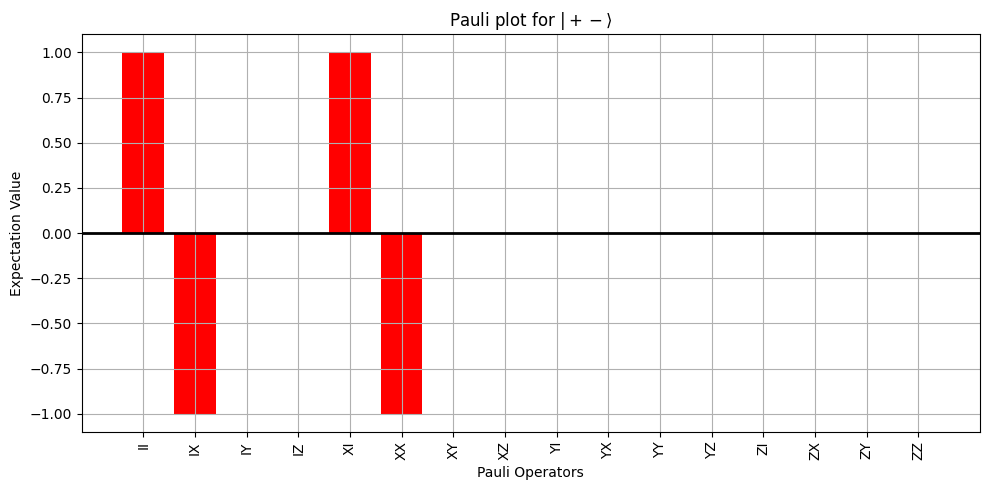

In [162]:
## Attention les conventions qiskit font que les deux moyennes sur IX et XI sont opposées en signe par rapport a ce qu'elles devraient être
# Créer le circuit quantique
qc = QuantumCircuit(2)
qc.x(1)
qc.h([0, 1])


# Obtenir l'état vectoriel
state = Statevector.from_instruction(qc)
matrix = DensityMatrix(qc)
print(matrix.data)
# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Afficher le circuit quantique dans le premier sous-graphe
qc.draw('mpl', ax=axs[0])

# Afficher le graphique PauliVec dans le deuxième sous-graphe
plot_state_paulivec(state, ax=axs[1], color='red', title=r"Pauli plot for $|+-\rangle$")

# Afficher la figure
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Définir les matrices de Pauli
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# Créer l'état |+-> = (|0> + |1>) / sqrt(2) ⊗ (|0> - |1>) / sqrt(2)
plus = (np.array([1, 0]) + np.array([0, 1])) / np.sqrt(2)
minus = (np.array([1, 0]) - np.array([0, 1])) / np.sqrt(2)
state = np.kron(plus, minus)

# Calculer la matrice de densité
density_matrix = np.outer(state, np.conj(state))

# Définir les combinaisons d'observables
pauli_labels = ['I', 'X', 'Y', 'Z']
pauli_matrices = [I, X, Y, Z]

# Calculer les valeurs d'attente pour toutes les combinaisons d'observables
pauli_vec = np.zeros(16, dtype=complex)
for i, pauli1 in enumerate(pauli_matrices):
    for j, pauli2 in enumerate(pauli_matrices):
        pauli_product = np.kron(pauli1, pauli2)
        pauli_vec[i * 4 + j] = np.trace(density_matrix @ pauli_product)

# Afficher les valeurs d'attente
print("PauliVec values:")
for i, pauli1 in enumerate(pauli_labels):
    for j, pauli2 in enumerate(pauli_labels):
        print(f"{pauli1}{pauli2}: {pauli_vec[i * 4 + j].real:.4f}")

# Créer une figure avec un seul sous-graphe
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Afficher le graphique PauliVec
ax.bar(range(16), pauli_vec.real, tick_label=[f"{p1}{p2}" for p1 in pauli_labels for p2 in pauli_labels], color='red')
ax.set_title(r"Pauli plot for $|+-\rangle$")
ax.set_xlabel('Pauli Operators')
ax.set_ylabel('Expectation Value')
plt.xticks(rotation=90)
plt.grid()

# Ajouter une ligne horizontale en gras à y=0
ax.axhline(0, color='black', linewidth=2)

# Afficher la figure
plt.tight_layout()
plt.show()

## Question 30 : |B00> Pauli plot

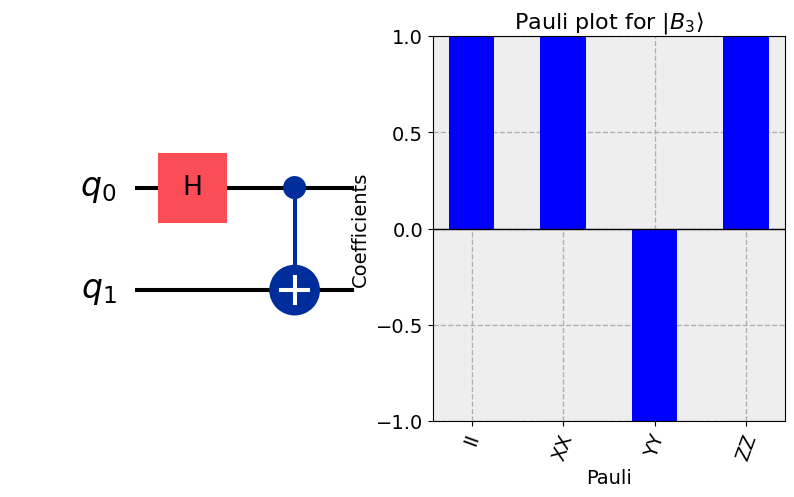

PauliVec values:
II: 1.0000
IX: 0.0000
IY: 0.0000
IZ: 0.0000
XI: 0.0000
XX: 1.0000
XY: 0.0000
XZ: 0.0000
YI: 0.0000
YX: 0.0000
YY: -1.0000
YZ: 0.0000
ZI: 0.0000
ZX: 0.0000
ZY: 0.0000
ZZ: 1.0000


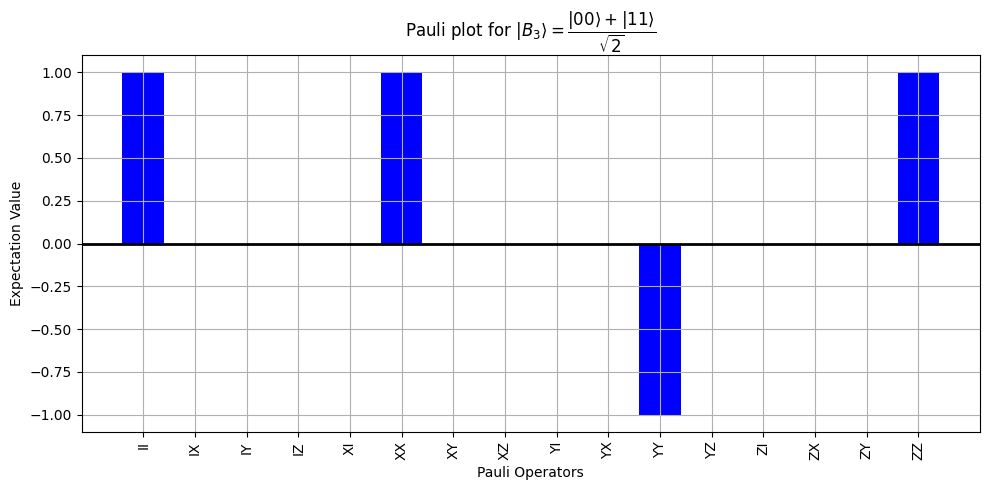

In [163]:
# Créer le circuit quantique
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Obtenir l'état vectoriel
state = Statevector.from_instruction(qc)

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Afficher le circuit quantique dans le premier sous-graphe
qc.draw('mpl', ax=axs[0])

# Afficher le graphique PauliVec dans le deuxième sous-graphe
plot_state_paulivec(state, ax=axs[1], color='blue', title=r"Pauli plot for $|B_{3}\rangle$")

# Afficher la figure
plt.show()

# Créer l'état |+-> = (|0> + |1>) / sqrt(2) ⊗ (|0> - |1>) / sqrt(2)
state_00 = np.kron(np.array([1, 0]), np.array([1, 0]))
state_11 = np.kron(np.array([0, 1]), np.array([0, 1]))
Bell_00 = (state_00 + state_11) / np.sqrt(2)

# Calculer la matrice de densité
density_matrix = np.outer(Bell_00, np.conj(Bell_00))

# Calculer les valeurs d'attente pour toutes les combinaisons d'observables
pauli_vec = np.zeros(16, dtype=complex)
for i, pauli1 in enumerate(pauli_matrices):
    for j, pauli2 in enumerate(pauli_matrices):
        pauli_product = np.kron(pauli1, pauli2)
        pauli_vec[i * 4 + j] = np.trace(density_matrix @ pauli_product)

# Afficher les valeurs d'attente
print("PauliVec values:")
for i, pauli1 in enumerate(pauli_labels):
    for j, pauli2 in enumerate(pauli_labels):
        print(f"{pauli1}{pauli2}: {pauli_vec[i * 4 + j].real:.4f}")

# Créer une figure avec un seul sous-graphe
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Afficher le graphique PauliVec
ax.bar(range(16), pauli_vec.real, tick_label=[f"{p1}{p2}" for p1 in pauli_labels for p2 in pauli_labels], color='blue')
ax.set_title(r"Pauli plot for $|B_{3}\rangle = \dfrac{|00\rangle + |11\rangle}{\sqrt{2}}$")
ax.set_xlabel('Pauli Operators')
ax.set_ylabel('Expectation Value')
plt.xticks(rotation=90)
plt.grid()

# Ajouter une ligne horizontale en gras à y=0
ax.axhline(0, color='black', linewidth=2)

# Afficher la figure
plt.tight_layout()
plt.show()

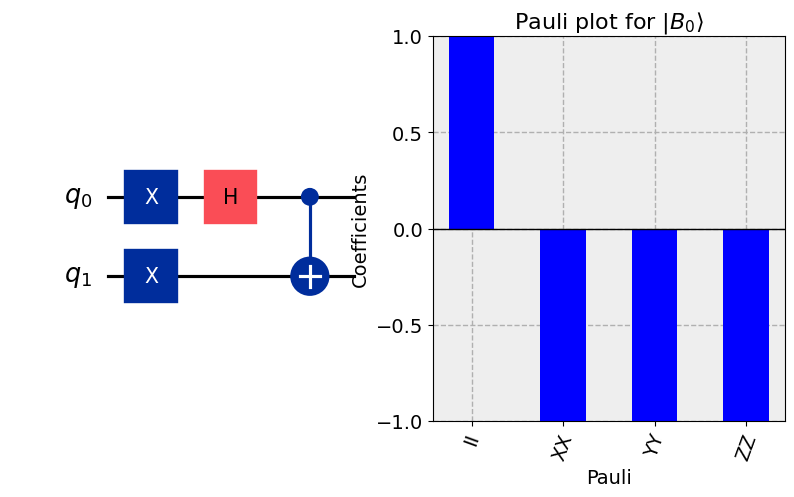

In [8]:
# Créer le circuit quantique
qc = QuantumCircuit(2)
qc.x([0, 1])
qc.h(0)
qc.cx(0, 1)

# Obtenir l'état vectoriel
state = Statevector.from_instruction(qc)

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Afficher le circuit quantique dans le premier sous-graphe
qc.draw('mpl', ax=axs[0])

# Afficher le graphique PauliVec dans le deuxième sous-graphe
plot_state_paulivec(state, ax=axs[1], color='blue', title=r"Pauli plot for $|B_{0}\rangle$")

# Afficher la figure
plt.show()

## Question 33

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

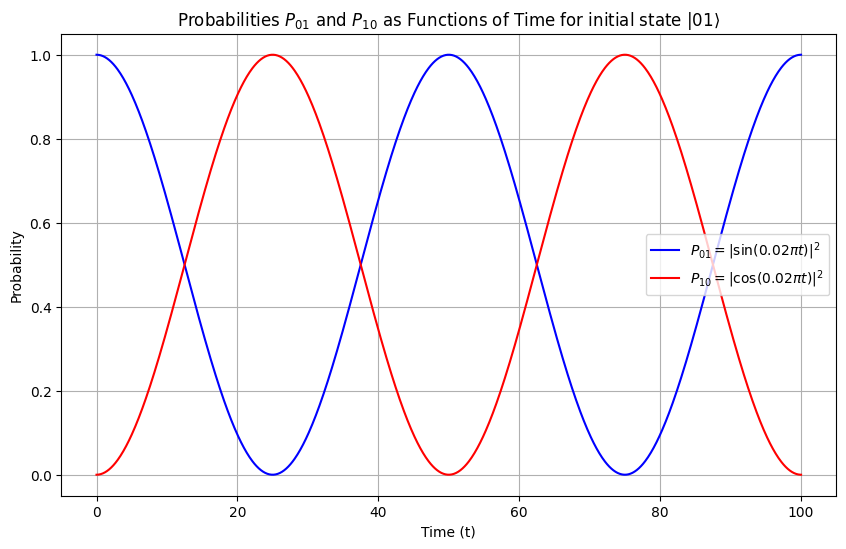

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

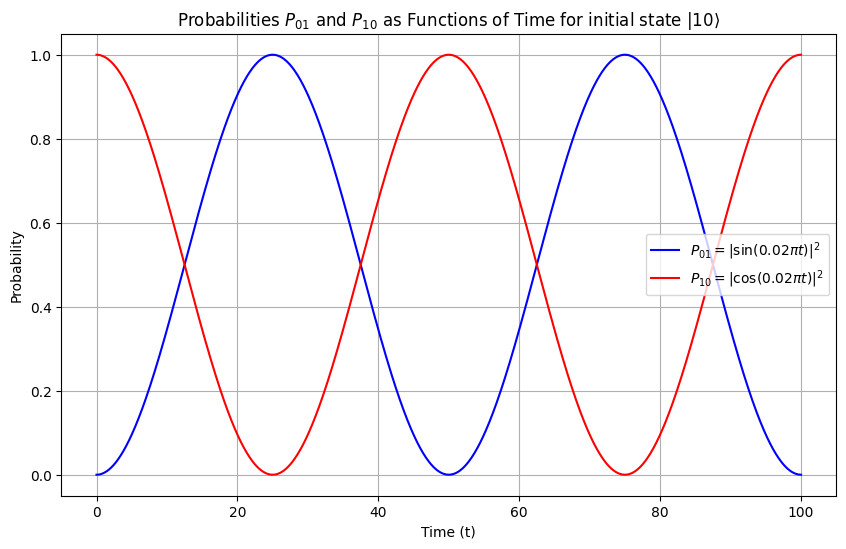

Matrix([
[                               0],
[-1.0*I*sin(0.0628318530717959*t)],
[   1.0*cos(0.0628318530717959*t)],
[                               0]])

In [ ]:
from sympy import Matrix
from IPython.display import Math
import sympy as sp
from sympy.physics.quantum import TensorProduct

theta, phi, lamda, omega_x, omega_y, omega_z, omega, t, delta, omega_1, a_x, a_y, a_z, alpha, beta, w, omega_2, g= sp.symbols('theta phi lambda omega_x omega_y omega_z omega t delta omega_1 a_x a_y a_z alpha beta w omega_2 g')
I = sp.I 

## valeur des parametres de l'hamiltonien
g=2*sp.pi*0.01
omega_1 = 2*sp.pi*1
omega_2 = 2*sp.pi*1


comput_0 = sp.Matrix([[1], [0]])
comput_1 = sp.Matrix([[0], [1]])
sigma_x = sp.Matrix([[0, 1], [1, 0]])
sigma_y = sp.Matrix([[0, -I], [I, 0]])
sigma_z = sp.Matrix([[1, 0], [0, -1]])
sigma_z1 = TensorProduct(sigma_z, sp.eye(2))
sigma_z2 = TensorProduct(sp.eye(2), sigma_z)
sigma_x1 = TensorProduct(sigma_x, sp.eye(2))
sigma_x2 = TensorProduct(sp.eye(2), sigma_x)
ket_00 = TensorProduct(comput_0, comput_0)
ket_01 = TensorProduct(comput_0, comput_1)  
ket_10 = TensorProduct(comput_1, comput_0)
ket_11 = TensorProduct(comput_1, comput_1)


display(Math(r'\sigma_{\hat{Z}_1} = ' + sp.latex(sigma_z1)))
display(Math(r'\sigma_{\hat{Z}_2} = ' + sp.latex(sigma_z2)))
display(Math(r'\sigma_{\hat{X}_1} = ' + sp.latex(sigma_x1)))
display(Math(r'\sigma_{\hat{X}_2} = ' + sp.latex(sigma_x2)))

H = -omega_1 * sigma_z1/2 - omega_2 * sigma_z2/2 + g*(sigma_x1 @ sigma_x2)
# H_notebook = omega_1 * sigma_z1/2 + omega_2 * sigma_z2/2 + g*(sigma_x1 @ sigma_x2)/2
# U = sp.exp(-I * H * t)
eigenvalues = H.eigenvals()
eigenvectors = H.eigenvects()

display(Math(r'H = ' + sp.latex(H)))
# display(Math(r'H_{notebook} = ' + sp.latex(H_notebook)))
# display(Math(r'U = ' + sp.latex(U)))
display(Math(r'eigenvalues = ' + sp.latex(eigenvalues)))
display(Math(r'eigenvectors = ' + sp.latex(eigenvectors)))
# display(Math(r'|10\rangle = ' + sp.latex(ket_10)))

eigenv00 = H @ ket_00
display(Math(r'H|00\rangle = ' + sp.latex(eigenv00)))
eigenv11 = H @ ket_11
display(Math(r'H|11\rangle = ' + sp.latex(eigenv11)))
eigenv01 = H @ ket_01
display(Math(r'H|01\rangle = ' + sp.latex(eigenv01)))
eigenv10 = H @ ket_10
display(Math(r'H|10\rangle = ' + sp.latex(eigenv10)))

U = sp.exp(-I * H * t) 


## Evoltion of state |01> 
evol01 = U @ ket_01
display(Math(r'U|01\rangle = ' + sp.latex(evol01)))

c01 = sp.Abs(evol01[1])**2
c01 = sp.simplify(c01)
c10 = sp.Abs(evol01[2])**2
c10 = sp.simplify(c10)

display(Math(r'P_{01} = ' + sp.latex(c01)))
display(Math(r'P_{10} = ' + sp.latex(c10)))

import matplotlib.pyplot as plt

# Parameters
t = np.linspace(0, 100, 1000)  # Time from 0 to 100
om = 0.02 * np.pi  # Frequency given in the problem

# Expressions for P01 and P10
P01 = np.cos(om * t)**2
P10 = np.sin(om * t)**2

# Plot the two probabilities
plt.figure(figsize=(10, 6))
plt.plot(t, P01, label=r'$P_{01} = |\sin(0.02 \pi t)|^2$', color='blue')
plt.plot(t, P10, label=r'$P_{10} = |\cos(0.02 \pi t)|^2$', color='red')
plt.title(r"Probabilities $P_{01}$ and $P_{10}$ as Functions of Time for initial state $\vert 01 \rangle$")
plt.xlabel("Time (t)")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

## Evolution of initial state |10>
evol10 = U @ ket_10
display(Math(r'U|10\rangle = ' + sp.latex(evol10)))

c01 = sp.Abs(evol10[1])**2
c01 = sp.simplify(c01)
c10 = sp.Abs(evol10[2])**2
c10 = sp.simplify(c10)

display(Math(r'P_{01} = ' + sp.latex(c01)))
display(Math(r'P_{10} = ' + sp.latex(c10)))

import matplotlib.pyplot as plt

# Parameters
t = np.linspace(0, 100, 1000)  # Time from 0 to 100
om = 0.02 * np.pi  # Frequency given in the problem

# Expressions for P01 and P10
P01 = np.sin(om * t)**2
P10 = np.cos(om * t)**2

# Plot the two probabilities
plt.figure(figsize=(10, 6))
plt.plot(t, P01, label=r'$P_{01} = |\sin(0.02 \pi t)|^2$', color='blue')
plt.plot(t, P10, label=r'$P_{10} = |\cos(0.02 \pi t)|^2$', color='red')
plt.title(r"Probabilities $P_{01}$ and $P_{10}$ as Functions of Time for initial state $\vert 10 \rangle$")

plt.xlabel("Time (t)")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()






In [110]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
#! pip install qutip # for Google Colab
import qutip as qt
import matplotlib.pyplot as plt

time_list = np.linspace(0, 201, 2001) # [ns]

g=0.01 #[GHz]
freq_q1=1 #[GHz]
freq_q2=1 #[GHz]

omega_q1=freq_q1*2*np.pi
omega_q2=freq_q2*2*np.pi
g_=g*2*np.pi

# definition of the hamiltonian in laboratory frame
sigmaz_1=qt.tensor(qt.sigmaz(),qt.qeye(2))
sigmaz_2=qt.tensor(qt.qeye(2),qt.sigmaz())
sigmax_1=qt.tensor(qt.sigmax(),qt.qeye(2))
sigmax_2=qt.tensor(qt.qeye(2),qt.sigmax())
H_ = omega_q1/2*sigmaz_1 + omega_q2/2*sigmaz_2 + g_*sigmax_1*sigmax_2

# definition of the initial state (|00> state)
psi00 = qt.tensor(qt.basis(2,0),qt.basis(2,0)) # |00>
psi01 = qt.tensor(qt.basis(2,0),qt.basis(2,1)) # |01>
psi10 = qt.tensor(qt.basis(2,1),qt.basis(2,0)) # |10>
psi11 = qt.tensor(qt.basis(2,1),qt.basis(2,1)) # |11>

# solve the Schrodinger
# start from |00> state
result00 = qt.mesolve(H=H_, rho0=psi00, tlist=time_list,
                 e_ops=[sigmaz_1,sigmaz_2],options={"store_states":True})
# start from |01> state
result01 = qt.mesolve(H=H_, rho0=psi01, tlist=time_list,
                 e_ops=[sigmaz_1,sigmaz_2],options={"store_states":True})
# start from |10> state
result10 = qt.mesolve(H=H_, rho0=psi10, tlist=time_list,
                 e_ops=[sigmaz_1,sigmaz_2],options={"store_states":True})
# start from |11> state
result11 = qt.mesolve(H=H_, rho0=psi11, tlist=time_list,
                 e_ops=[sigmaz_1,sigmaz_2],options={"store_states":True})



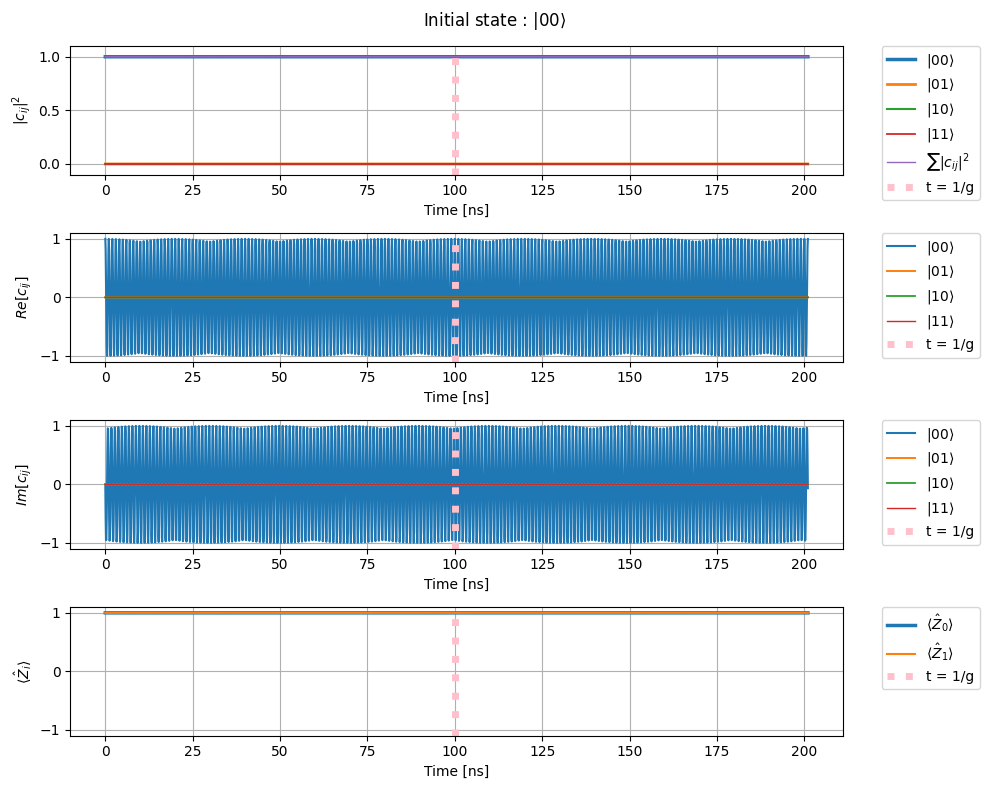

In [111]:
##------------- start from |00> -------------##
fig=plt.figure(figsize=(10,8))
fig.suptitle(r"Initial state : $|00\rangle$")
## figure 1 : plotting |c_ij|^2
# plot each coefficient of state vector
ax1=fig.add_subplot(4,1,1)
psi_array=result00.states
c00_array=[state.full()[0, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c00_array)**2, label=r"$|00\rangle$",linewidth=2.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c01_array)**2, label=r"$|01\rangle$",linewidth=2)
c10_array=[state.full()[2, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c10_array)**2, label=r"$|10\rangle$",linewidth=1.5)
c11_array=[state.full()[3, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c11_array)**2, label=r"$|11\rangle$",linewidth=1.3)
sum_array=np.abs(c00_array)**2+np.abs(c01_array)**2+np.abs(c10_array)**2+np.abs(c11_array)**2
ax1.plot(time_list, sum_array, label=r"$\sum|c_{ij}|^2$",linewidth=1)
# vertical line at 1/g
ax1.axvline(x=1/g, color="pink", linestyle=":", linewidth=5,label="t = 1/g")

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel(r"$|c_{ij}|^2$")
ax1.grid(True)
ax1.set_ylim(-0.1,1.1)
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 2 : plotting Re[c_ij]
ax2=fig.add_subplot(4,1,2)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax2.plot(time_list, np.real(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax2.plot(time_list, np.real(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax2.plot(time_list, np.real(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax2.plot(time_list, np.real(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
ax2.axvline(x=1/g, color="pink", linestyle=":", linewidth=5,label="t = 1/g")

ax2.set_xlabel("Time [ns]")
ax2.set_ylabel(r"$Re[c_{ij}]$")
ax2.grid(True)
ax2.set_ylim(-1.1,1.1)
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 3 : plotting Im[c_ij]
ax3=fig.add_subplot(4,1,3)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
ax3.axvline(x=1/g, color="pink", linestyle=":", linewidth=5,label="t = 1/g")

ax3.set_xlabel("Time [ns]")
ax3.set_ylabel(r"$Im[c_{ij}]$")
ax3.grid(True)
ax3.set_ylim(-1.1,1.1)
ax3.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 4 : plotting <Z_i>
ax4=fig.add_subplot(4,1,4)
# plot each qubit population
ax4.plot(time_list, result00.expect[0], label=r"$\langle\hat{Z}_0\rangle$",linewidth=2.5)
ax4.plot(time_list, result00.expect[1], label=r"$\langle\hat{Z}_1\rangle$",linewidth=1.5)

# vertical line at 1/g
ax4.axvline(x=1/g, color="pink", linestyle=":", linewidth=5,label="t = 1/g")

ax4.set_xlabel("Time [ns]")
ax4.set_ylabel(r"$\langle\hat{Z}_i\rangle$")
ax4.grid(True)
ax4.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)
ax4.set_ylim(-1.1,1.1)

plt.tight_layout()
plt.show()

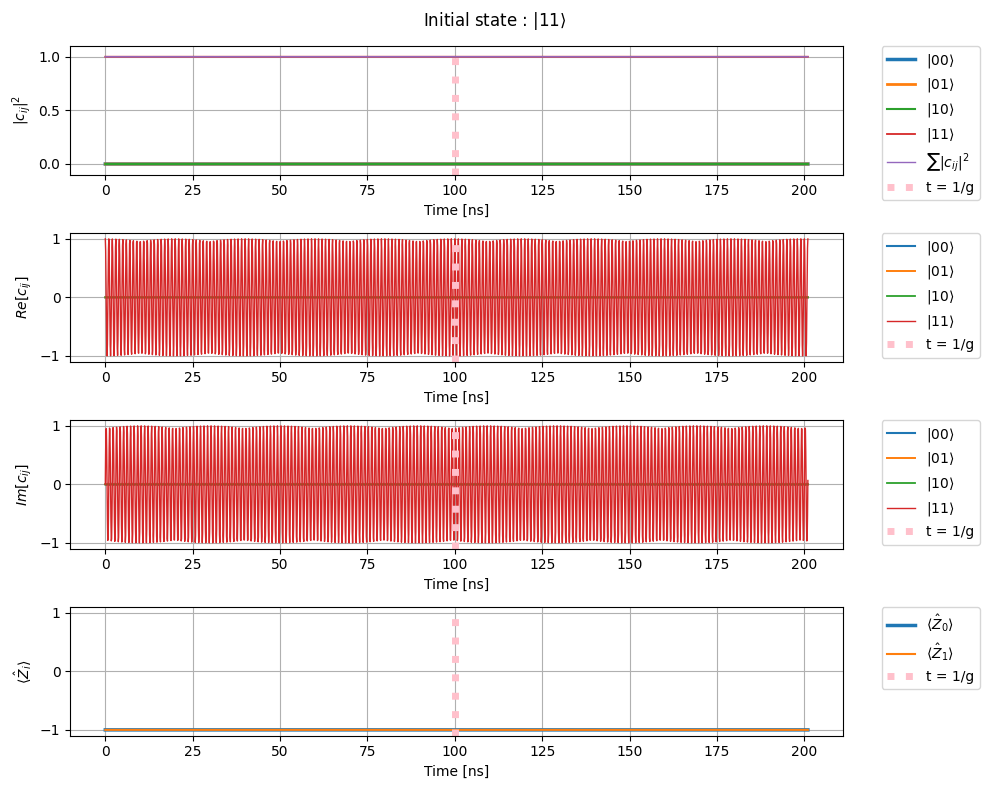

In [112]:
##------------- start from |11> -------------##
fig=plt.figure(figsize=(10,8))
fig.suptitle(r"Initial state : $|11\rangle$")
## figure 1 : plotting |c_ij|^2
# plot each coefficient of state vector
ax1=fig.add_subplot(4,1,1)
psi_array=result11.states
c00_array=[state.full()[0, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c00_array)**2, label=r"$|00\rangle$",linewidth=2.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c01_array)**2, label=r"$|01\rangle$",linewidth=2)
c10_array=[state.full()[2, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c10_array)**2, label=r"$|10\rangle$",linewidth=1.5)
c11_array=[state.full()[3, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c11_array)**2, label=r"$|11\rangle$",linewidth=1.3)
sum_array=np.abs(c00_array)**2+np.abs(c01_array)**2+np.abs(c10_array)**2+np.abs(c11_array)**2
ax1.plot(time_list, sum_array, label=r"$\sum|c_{ij}|^2$",linewidth=1)
# vertical line at 1/g
ax1.axvline(x=1/g, color="pink", linestyle=":", linewidth=5,label="t = 1/g")

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel(r"$|c_{ij}|^2$")
ax1.grid(True)
ax1.set_ylim(-0.1,1.1)
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 2 : plotting Re[c_ij]
ax2=fig.add_subplot(4,1,2)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax2.plot(time_list, np.real(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax2.plot(time_list, np.real(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax2.plot(time_list, np.real(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax2.plot(time_list, np.real(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
ax2.axvline(x=1/g, color="pink", linestyle=":", linewidth=5,label="t = 1/g")

ax2.set_xlabel("Time [ns]")
ax2.set_ylabel(r"$Re[c_{ij}]$")
ax2.grid(True)
ax2.set_ylim(-1.1,1.1)
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 3 : plotting Im[c_ij]
ax3=fig.add_subplot(4,1,3)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
ax3.axvline(x=1/g, color="pink", linestyle=":", linewidth=5,label="t = 1/g")

ax3.set_xlabel("Time [ns]")
ax3.set_ylabel(r"$Im[c_{ij}]$")
ax3.grid(True)
ax3.set_ylim(-1.1,1.1)
ax3.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 4 : plotting <Z_i>
ax4=fig.add_subplot(4,1,4)
# plot each qubit population
ax4.plot(time_list, result11.expect[0], label=r"$\langle\hat{Z}_0\rangle$",linewidth=2.5)
ax4.plot(time_list, result11.expect[1], label=r"$\langle\hat{Z}_1\rangle$",linewidth=1.5)

# vertical line at 1/g
ax4.axvline(x=1/g, color="pink", linestyle=":", linewidth=5,label="t = 1/g")

ax4.set_xlabel("Time [ns]")
ax4.set_ylabel(r"$\langle\hat{Z}_i\rangle$")
ax4.grid(True)
ax4.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)
ax4.set_ylim(-1.1,1.1)

plt.tight_layout()
plt.show()

## Question 34

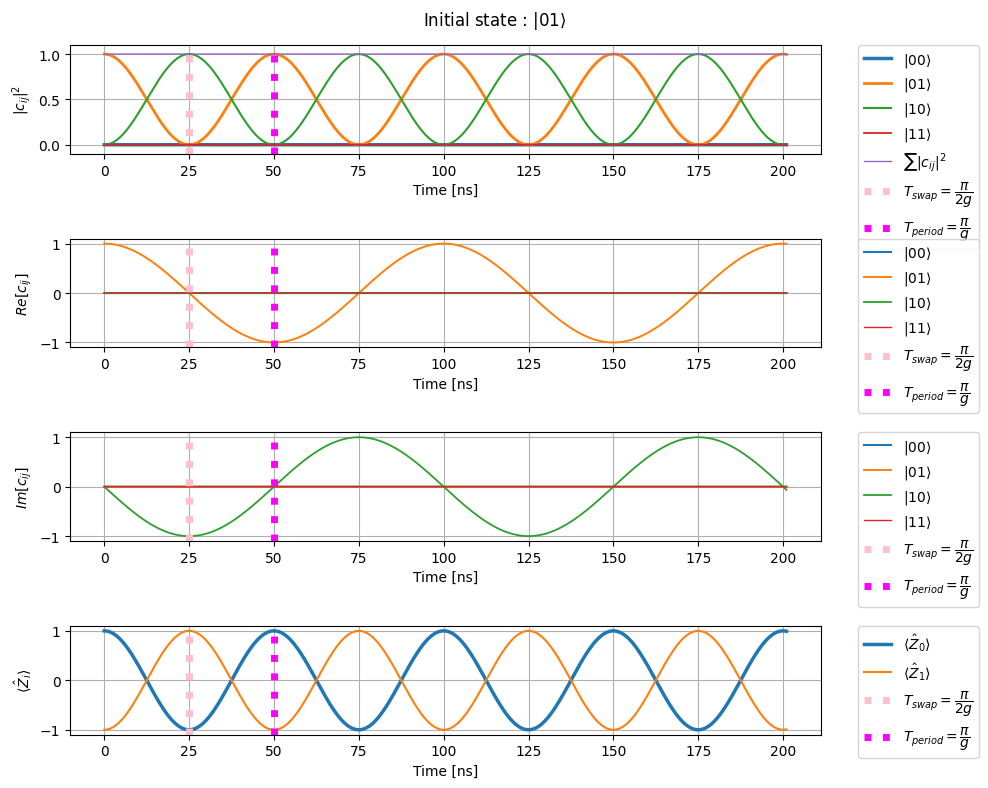

24.999999999999996


In [134]:
##------------- start from |01> -------------##
fig=plt.figure(figsize=(10,8))
fig.suptitle(r"Initial state : $|01\rangle$")
## figure 1 : plotting |c_ij|^2
# plot each coefficient of state vector
ax1=fig.add_subplot(4,1,1)
psi_array=result01.states
c00_array=[state.full()[0, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c00_array)**2, label=r"$|00\rangle$",linewidth=2.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c01_array)**2, label=r"$|01\rangle$",linewidth=2)
c10_array=[state.full()[2, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c10_array)**2, label=r"$|10\rangle$",linewidth=1.5)
c11_array=[state.full()[3, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c11_array)**2, label=r"$|11\rangle$",linewidth=1.3)
sum_array=np.abs(c00_array)**2+np.abs(c01_array)**2+np.abs(c10_array)**2+np.abs(c11_array)**2
ax1.plot(time_list, sum_array, label=r"$\sum|c_{ij}|^2$",linewidth=1)
# vertical line at 1/g
ax1.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax1.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel(r"$|c_{ij}|^2$")
ax1.grid(True)
ax1.set_ylim(-0.1,1.1)
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 2 : plotting Re[c_ij]
ax2=fig.add_subplot(4,1,2)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax2.plot(time_list, np.real(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax2.plot(time_list, np.real(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax2.plot(time_list, np.real(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax2.plot(time_list, np.real(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
ax2.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax2.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax2.set_xlabel("Time [ns]")
ax2.set_ylabel(r"$Re[c_{ij}]$")
ax2.grid(True)
ax2.set_ylim(-1.1,1.1)
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 3 : plotting Im[c_ij]
ax3=fig.add_subplot(4,1,3)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
ax3.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax3.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax3.set_xlabel("Time [ns]")
ax3.set_ylabel(r"$Im[c_{ij}]$")
ax3.grid(True)
ax3.set_ylim(-1.1,1.1)
ax3.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 4 : plotting <Z_i>
ax4=fig.add_subplot(4,1,4)
# plot each qubit population
ax4.plot(time_list, result01.expect[0], label=r"$\langle\hat{Z}_0\rangle$",linewidth=2.5)
ax4.plot(time_list, result01.expect[1], label=r"$\langle\hat{Z}_1\rangle$",linewidth=1.5)

# vertical line at 1/g
ax4.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax4.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax4.set_xlabel("Time [ns]")
ax4.set_ylabel(r"$\langle\hat{Z}_i\rangle$")
ax4.grid(True)
ax4.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)
ax4.set_ylim(-1.1,1.1)

plt.tight_layout()
plt.show()

print(np.pi/(2*g_))


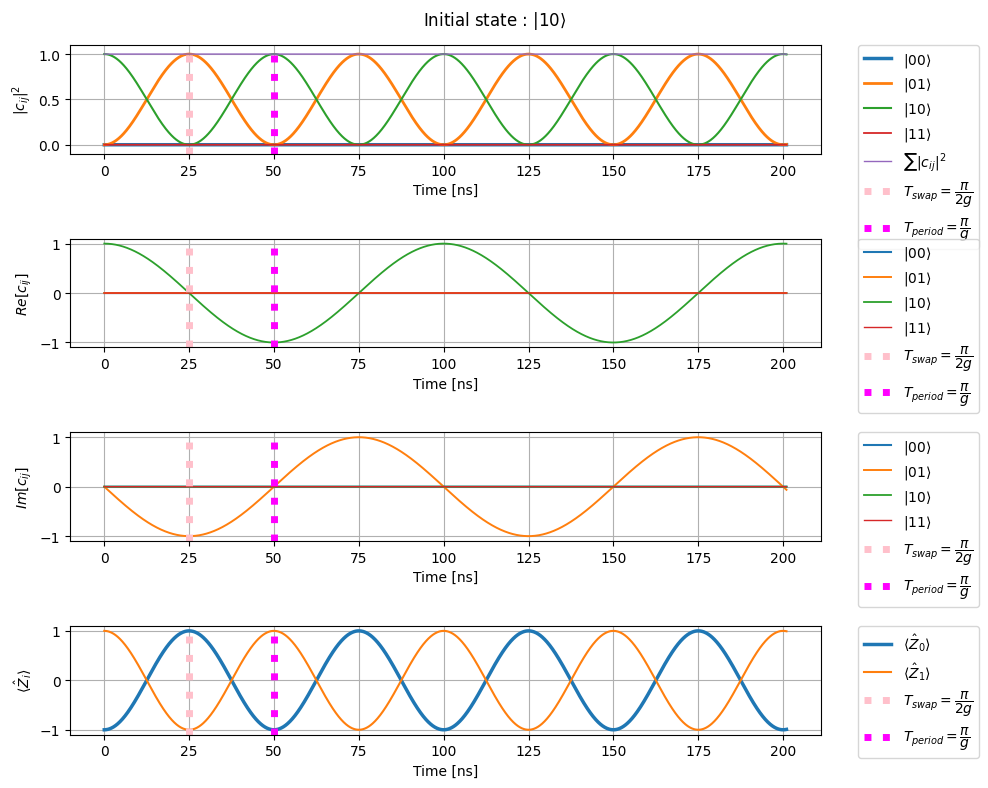

In [128]:
##------------- start from |10> -------------##
fig=plt.figure(figsize=(10,8))
fig.suptitle(r"Initial state : $|10\rangle$")
## figure 1 : plotting |c_ij|^2
# plot each coefficient of state vector
ax1=fig.add_subplot(4,1,1)
psi_array=result10.states
c00_array=[state.full()[0, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c00_array)**2, label=r"$|00\rangle$",linewidth=2.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c01_array)**2, label=r"$|01\rangle$",linewidth=2)
c10_array=[state.full()[2, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c10_array)**2, label=r"$|10\rangle$",linewidth=1.5)
c11_array=[state.full()[3, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c11_array)**2, label=r"$|11\rangle$",linewidth=1.3)
sum_array=np.abs(c00_array)**2+np.abs(c01_array)**2+np.abs(c10_array)**2+np.abs(c11_array)**2
ax1.plot(time_list, sum_array, label=r"$\sum|c_{ij}|^2$",linewidth=1)
# vertical line at 1/g
ax1.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax1.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel(r"$|c_{ij}|^2$")
ax1.grid(True)
ax1.set_ylim(-0.1,1.1)
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 2 : plotting Re[c_ij]
ax2=fig.add_subplot(4,1,2)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax2.plot(time_list, np.real(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax2.plot(time_list, np.real(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax2.plot(time_list, np.real(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax2.plot(time_list, np.real(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
ax2.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax2.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax2.set_xlabel("Time [ns]")
ax2.set_ylabel(r"$Re[c_{ij}]$")
ax2.grid(True)
ax2.set_ylim(-1.1,1.1)
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 3 : plotting Im[c_ij]
ax3=fig.add_subplot(4,1,3)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
ax3.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax3.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax3.set_xlabel("Time [ns]")
ax3.set_ylabel(r"$Im[c_{ij}]$")
ax3.grid(True)
ax3.set_ylim(-1.1,1.1)
ax3.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 4 : plotting <Z_i>
ax4=fig.add_subplot(4,1,4)
# plot each qubit population
ax4.plot(time_list, result10.expect[0], label=r"$\langle\hat{Z}_0\rangle$",linewidth=2.5)
ax4.plot(time_list, result10.expect[1], label=r"$\langle\hat{Z}_1\rangle$",linewidth=1.5)

# vertical line at 1/g
ax4.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax4.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax4.set_xlabel("Time [ns]")
ax4.set_ylabel(r"$\langle\hat{Z}_i\rangle$")
ax4.grid(True)
ax4.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)
ax4.set_ylim(-1.1,1.1)

plt.tight_layout()
plt.show()

## Question 35

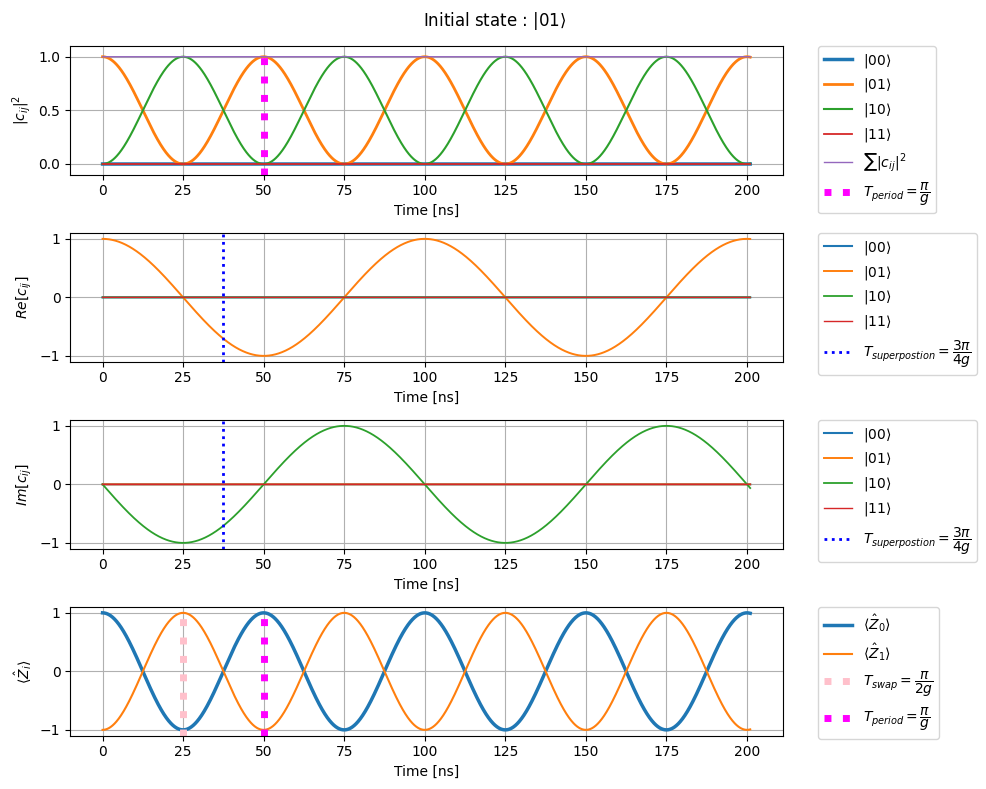

24.999999999999996


In [142]:
##------------- start from |01> -------------##
fig=plt.figure(figsize=(10,8))
fig.suptitle(r"Initial state : $|01\rangle$")
## figure 1 : plotting |c_ij|^2
# plot each coefficient of state vector
ax1=fig.add_subplot(4,1,1)
psi_array=result01.states
c00_array=[state.full()[0, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c00_array)**2, label=r"$|00\rangle$",linewidth=2.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c01_array)**2, label=r"$|01\rangle$",linewidth=2)
c10_array=[state.full()[2, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c10_array)**2, label=r"$|10\rangle$",linewidth=1.5)
c11_array=[state.full()[3, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c11_array)**2, label=r"$|11\rangle$",linewidth=1.3)
sum_array=np.abs(c00_array)**2+np.abs(c01_array)**2+np.abs(c10_array)**2+np.abs(c11_array)**2
ax1.plot(time_list, sum_array, label=r"$\sum|c_{ij}|^2$",linewidth=1)
# vertical line at 1/g
#ax1.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax1.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel(r"$|c_{ij}|^2$")
ax1.grid(True)
ax1.set_ylim(-0.1,1.1)
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 2 : plotting Re[c_ij]
ax2=fig.add_subplot(4,1,2)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax2.plot(time_list, np.real(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax2.plot(time_list, np.real(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax2.plot(time_list, np.real(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax2.plot(time_list, np.real(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
#ax2.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
#ax2.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")
ax2.axvline(x=3*np.pi/(4*g_), color="blue", linestyle="dotted", linewidth=2,label="$T_{superpostion} = \dfrac{3\pi}{4g}$")

ax2.set_xlabel("Time [ns]")
ax2.set_ylabel(r"$Re[c_{ij}]$")
ax2.grid(True)
ax2.set_ylim(-1.1,1.1)
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 3 : plotting Im[c_ij]
ax3=fig.add_subplot(4,1,3)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
#ax3.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")
#ax3.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax3.axvline(x=3*np.pi/(4*g_), color="blue", linestyle="dotted", linewidth=2,label="$T_{superpostion} = \dfrac{3\pi}{4g}$")

ax3.set_xlabel("Time [ns]")
ax3.set_ylabel(r"$Im[c_{ij}]$")
ax3.grid(True)
ax3.set_ylim(-1.1,1.1)
ax3.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 4 : plotting <Z_i>
ax4=fig.add_subplot(4,1,4)
# plot each qubit population
ax4.plot(time_list, result01.expect[0], label=r"$\langle\hat{Z}_0\rangle$",linewidth=2.5)
ax4.plot(time_list, result01.expect[1], label=r"$\langle\hat{Z}_1\rangle$",linewidth=1.5)

# vertical line at 1/g
ax4.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax4.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax4.set_xlabel("Time [ns]")
ax4.set_ylabel(r"$\langle\hat{Z}_i\rangle$")
ax4.grid(True)
ax4.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)
ax4.set_ylim(-1.1,1.1)

plt.tight_layout()
plt.show()

print(np.pi/(2*g_))


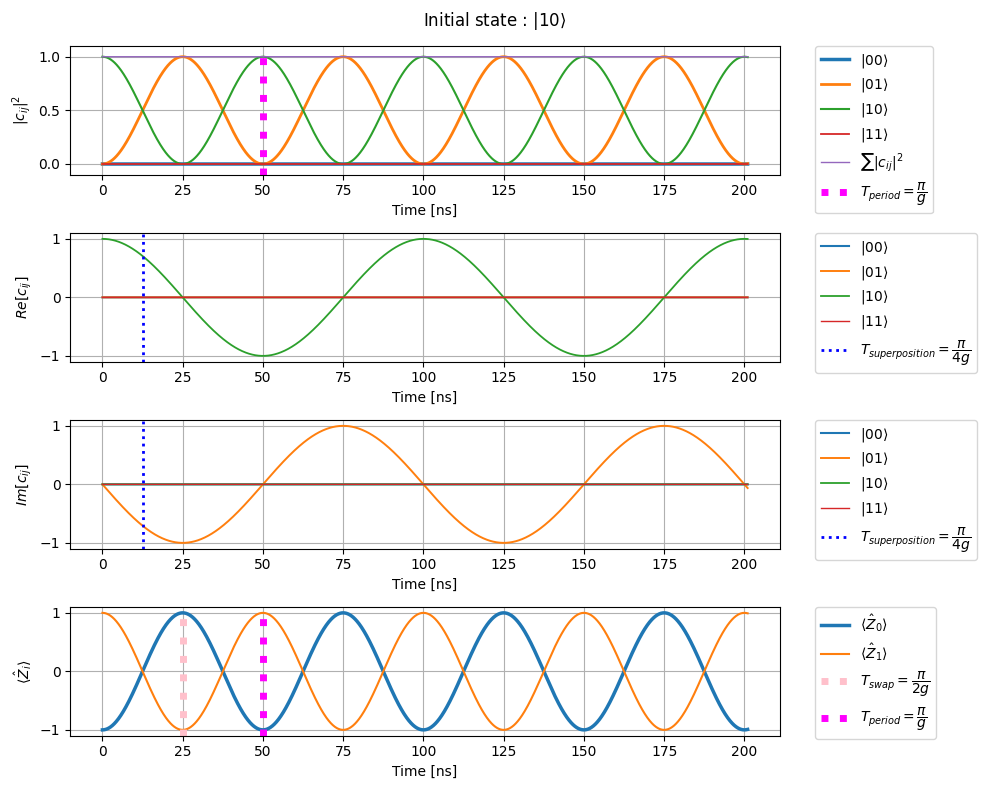

In [147]:
##------------- start from |10> -------------##
fig=plt.figure(figsize=(10,8))
fig.suptitle(r"Initial state : $|10\rangle$")
## figure 1 : plotting |c_ij|^2
# plot each coefficient of state vector
ax1=fig.add_subplot(4,1,1)
psi_array=result10.states
c00_array=[state.full()[0, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c00_array)**2, label=r"$|00\rangle$",linewidth=2.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c01_array)**2, label=r"$|01\rangle$",linewidth=2)
c10_array=[state.full()[2, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c10_array)**2, label=r"$|10\rangle$",linewidth=1.5)
c11_array=[state.full()[3, 0] for state in psi_array]
ax1.plot(time_list, np.abs(c11_array)**2, label=r"$|11\rangle$",linewidth=1.3)
sum_array=np.abs(c00_array)**2+np.abs(c01_array)**2+np.abs(c10_array)**2+np.abs(c11_array)**2
ax1.plot(time_list, sum_array, label=r"$\sum|c_{ij}|^2$",linewidth=1)
# vertical line at 1/g
#ax1.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax1.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax1.set_xlabel("Time [ns]")
ax1.set_ylabel(r"$|c_{ij}|^2$")
ax1.grid(True)
ax1.set_ylim(-0.1,1.1)
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 2 : plotting Re[c_ij]
ax2=fig.add_subplot(4,1,2)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax2.plot(time_list, np.real(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax2.plot(time_list, np.real(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax2.plot(time_list, np.real(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax2.plot(time_list, np.real(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
#ax2.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
#ax2.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")
ax2.axvline(x=np.pi/(4*g_), color="blue", linestyle="dotted", linewidth=2,label="$T_{superposition} = \dfrac{\pi}{4g}$")

ax2.set_xlabel("Time [ns]")
ax2.set_ylabel(r"$Re[c_{ij}]$")
ax2.grid(True)
ax2.set_ylim(-1.1,1.1)
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 3 : plotting Im[c_ij]
ax3=fig.add_subplot(4,1,3)
# plot each coefficient of state vector
c00_array=[state.full()[0, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c00_array), label=r"$|00\rangle$",linewidth=1.5)
c01_array=[state.full()[1, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c01_array), label=r"$|01\rangle$",linewidth=1.4)
c10_array=[state.full()[2, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c10_array), label=r"$|10\rangle$",linewidth=1.3)
c11_array=[state.full()[3, 0] for state in psi_array]
ax3.plot(time_list, np.imag(c11_array), label=r"$|11\rangle$",linewidth=1)
# vertical line at 1/g
#ax3.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
#ax3.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")
ax3.axvline(x=np.pi/(4*g_), color="blue", linestyle="dotted", linewidth=2,label="$T_{superposition} = \dfrac{\pi}{4g}$")

ax3.set_xlabel("Time [ns]")
ax3.set_ylabel(r"$Im[c_{ij}]$")
ax3.grid(True)
ax3.set_ylim(-1.1,1.1)
ax3.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

## figure 4 : plotting <Z_i>
ax4=fig.add_subplot(4,1,4)
# plot each qubit population
ax4.plot(time_list, result10.expect[0], label=r"$\langle\hat{Z}_0\rangle$",linewidth=2.5)
ax4.plot(time_list, result10.expect[1], label=r"$\langle\hat{Z}_1\rangle$",linewidth=1.5)

# vertical line at 1/g
ax4.axvline(x=np.pi/(2*g_), color="pink", linestyle=":", linewidth=5,label="$T_{swap} = \dfrac{\pi}{2g}$")
ax4.axvline(x=np.pi/(g_), color="fuchsia", linestyle=":", linewidth=5,label="$T_{period} = \dfrac{\pi}{g}$")

ax4.set_xlabel("Time [ns]")
ax4.set_ylabel(r"$\langle\hat{Z}_i\rangle$")
ax4.grid(True)
ax4.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)
ax4.set_ylim(-1.1,1.1)

plt.tight_layout()
plt.show()